In this project, we will work with the advertising data of a marketing agency to develop a machine learning algorithm that predicts if a particular user will click on an advertisement.

The data consists of 10 variables: 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', Timestamp' and 'Clicked on Ad'. The main variable I am interested in is 'Clicked on Ad'. This variable can have two possible outcomes: 0 and 1 where 0 refers to the case where a user didn't click the advertisement, while 1 refers to the scenario where a user clicks the advertisement.

Lets see if we can use the other 9 variables to accurately predict the value** 'Clicked on Ad' **variable. We will also perform some exploratory data analysis to see how *'Daily Time Spent on Site'* in combination with 'Ad Topic Line' affects the user's decision to click on the add.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('advertising_ef.csv')
data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [4]:
data.isna().sum()

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

There are null(missing) values inside some of the columns of the dataset.

In [5]:
data.rename(columns = {'Daily Time Spent on Site':'Daily_Spent_on_Site'}, inplace = True)

In [6]:
data["Daily_Spent_on_Site"].mean()


65.00946268656728

In [7]:
data["Daily_Spent_on_Site"].median()

68.37

In [8]:
data['Daily_Spent_on_Site'].fillna(data['Daily_Spent_on_Site'].median(),inplace = True)

In [9]:
data['Age'].mean()

35.96292585170341

In [10]:
data['Age'].median()

35.0

In [11]:
data['Age'].fillna(data['Age'].median(),inplace=True)

In [12]:
print(data['Area Income'].mean())
print(data['Area Income'].median())

54958.573617234484
56998.245


In [13]:
data['Area Income'].fillna(data['Area Income'].mean(),inplace=True)

In [14]:
data["Area Income"] = np.around(data['Area Income'], decimals = 2)

In [15]:
data['Daily Internet Usage'].fillna(data['Daily Internet Usage'].mean(),inplace=True)

In [16]:
data['City'].value_counts().index[0]

'Williamsport'

In [17]:
data['City'].fillna(data['City'].value_counts().index[0],inplace=True)

In [18]:
data['Country'].value_counts().index[0]
data['Country'].fillna(data['Country'].value_counts().index[0],inplace=True)

In [19]:
data.isna().sum()

Daily_Spent_on_Site     0
Age                     0
Area Income             0
Daily Internet Usage    0
Ad Topic Line           0
City                    0
Gender                  0
Country                 0
Timestamp               0
Clicked on Ad           0
dtype: int64

Now all the Null values have been imputed.

Finding the correlation between the columns

In [20]:
data.corr()

,Daily_Spent_on_Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily_Spent_on_Site,1.000000,-0.327560,0.310296,0.514047,-0.742900
Age,-0.327560,1.000000,-0.178185,-0.366353,0.487808
Area Income,0.310296,-0.178185,1.000000,0.331394,-0.472515
Daily Internet Usage,0.514047,-0.366353,0.331394,1.000000,-0.785501
Clicked on Ad,-0.742900,0.487808,-0.472515,-0.785501,1.000000


In [21]:
import seaborn as sns

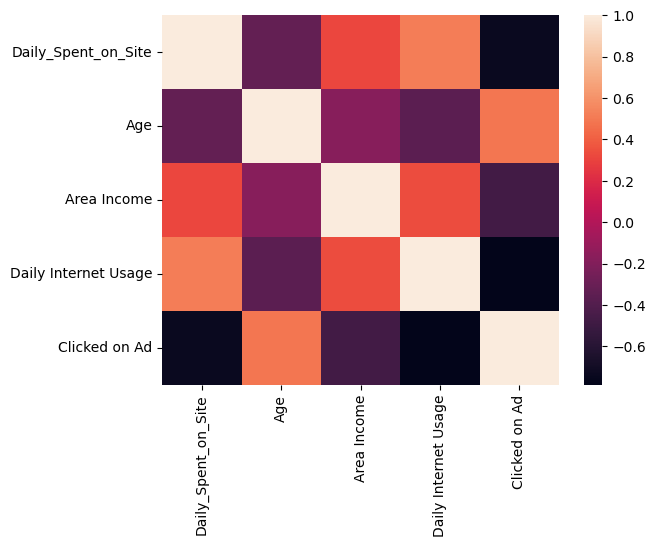

In [22]:
sns.heatmap(data.corr());

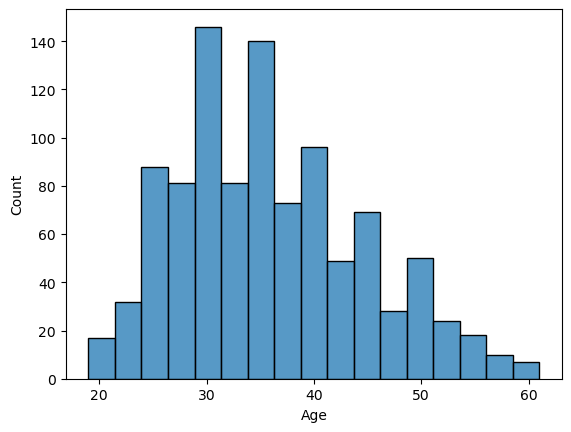

In [23]:
sns.histplot(data['Age']);

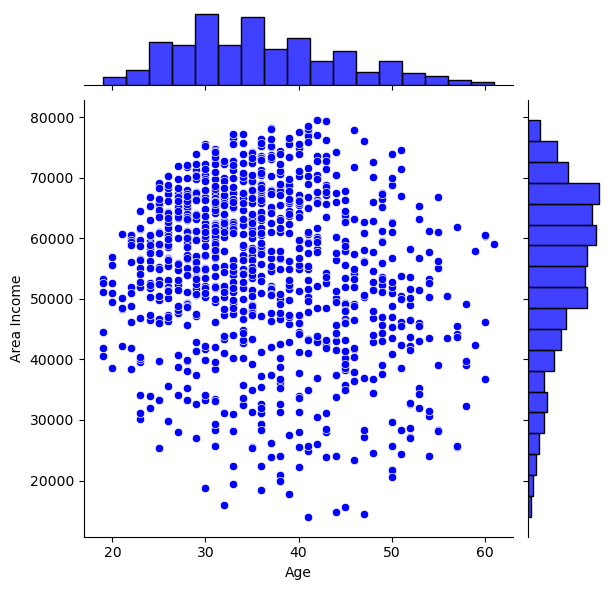

In [24]:
sns.jointplot(x = 'Age', y = 'Area Income', data = data, color = 'blue');

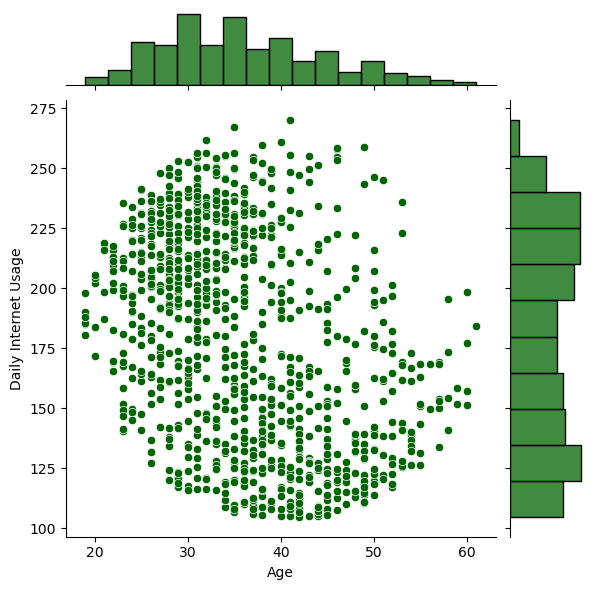

In [25]:
sns.jointplot(x= 'Age', y= 'Daily Internet Usage', data= data, color='darkgreen');

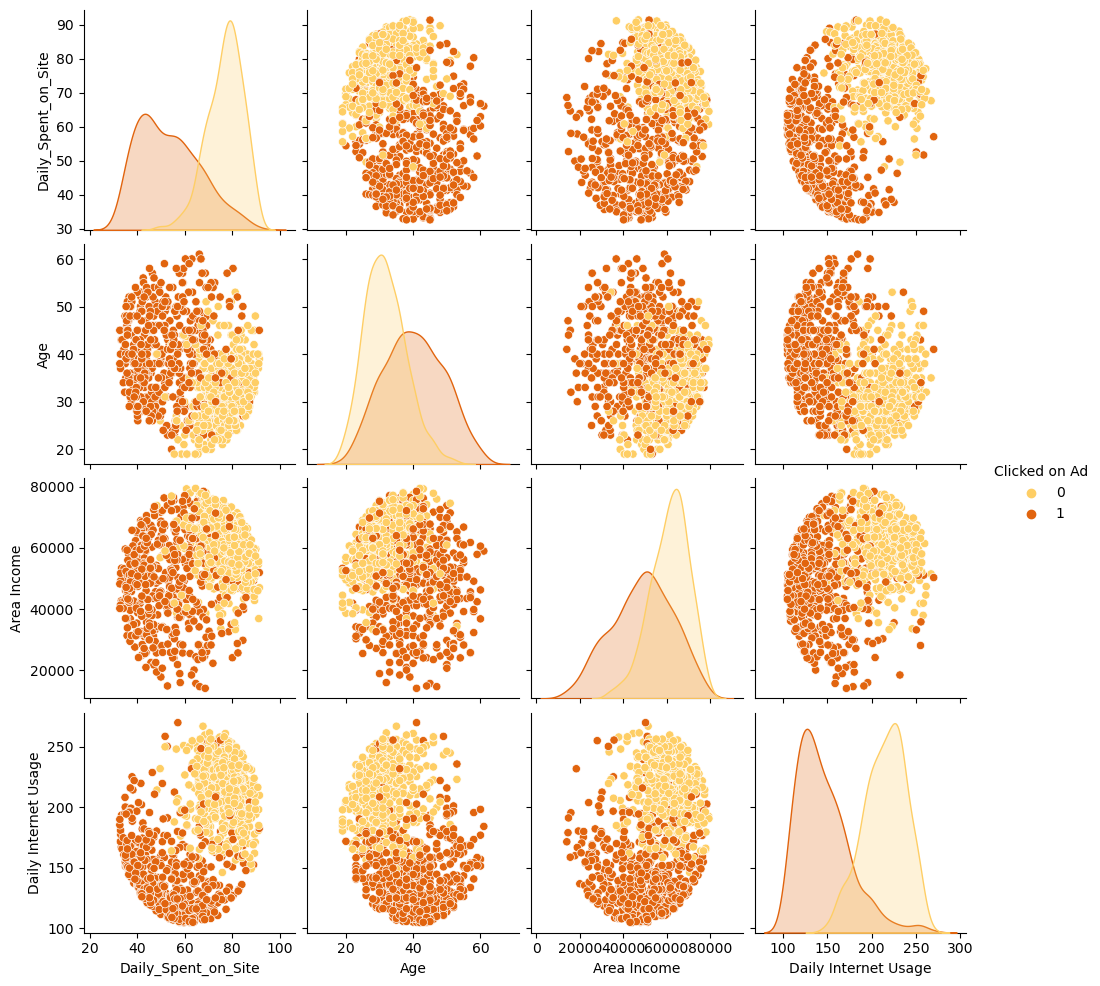

In [26]:
sns.pairplot(data,hue = 'Clicked on Ad',palette = "YlOrBr");

The Dataset is a classification that predicts values either '0' or '1' which is clicked or not clicked resp.

Now checking imbalance in the Dataset 

In [29]:
data['Clicked on Ad'].value_counts()

1    506
0    503
Name: Clicked on Ad, dtype: int64

In [28]:
data.to_csv('cleaned_ads.csv')

In [29]:
data = pd.read_csv('cleaned_ads.csv')

In [30]:
data.head(4)

,Daily_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1009 non-null   int64  
 1   Daily_Spent_on_Site   1009 non-null   float64
 2   Age                   1009 non-null   float64
 3   Area Income           1009 non-null   float64
 4   Daily Internet Usage  1009 non-null   float64
 5   Ad Topic Line         1009 non-null   object 
 6   City                  1009 non-null   object 
 7   Gender                1009 non-null   object 
 8   Country               1009 non-null   object 
 9   Timestamp             1009 non-null   object 
 10  Clicked on Ad         1009 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 86.8+ KB


Unique numbers



In [32]:
object_Dtype = ['Ad Topic Line','City','Country']
data[object_Dtype].describe(include = ['O'])

,Ad Topic Line,City,Country
count,1009,1009,1009
unique,1000,961,237
top,Networked local secured line,Lisamouth,Czech Republic
freq,2,14,22


So many unique values make it difficult to find a pattern from these columns to make a suitable models for predictions.

That`s why we reject the columns Ad Topic Line, City and Country.

Time Stamp column on the other hand as two different columns can effectively target the best timezone trends.



In [33]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'],axis = 1)

In [34]:
data.head()

,Unnamed: 0,Daily_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,0,3,0
1,1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,0,4,1
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,0,3,20
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,0,10,2
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,0,3,3


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [42]:
data.head()

,Daily_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,1
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,20
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,2
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,3


In [43]:
data.corr()

,Daily_Spent_on_Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Hour
Daily_Spent_on_Site,1.000000,-0.327560,0.310296,0.514047,-0.021174,-0.742900,-0.021973,0.005661
Age,-0.327560,1.000000,-0.178185,-0.366353,-0.016146,0.487808,0.021373,-0.054559
Area Income,0.310296,-0.178185,1.000000,0.331394,0.008326,-0.472515,-0.034775,0.030579
Daily Internet Usage,0.514047,-0.366353,0.331394,1.000000,0.027567,-0.785501,-0.002890,0.073225
Gender,-0.021174,-0.016146,0.008326,0.027567,1.000000,-0.038563,-0.029448,0.053415
Clicked on Ad,-0.742900,0.487808,-0.472515,-0.785501,-0.038563,1.000000,0.039507,-0.049069
Month,-0.021973,0.021373,-0.034775,-0.002890,-0.029448,0.039507,1.000000,-0.005081
Hour,0.005661,-0.054559,0.030579,0.073225,0.053415,-0.049069,-0.005081,1.000000


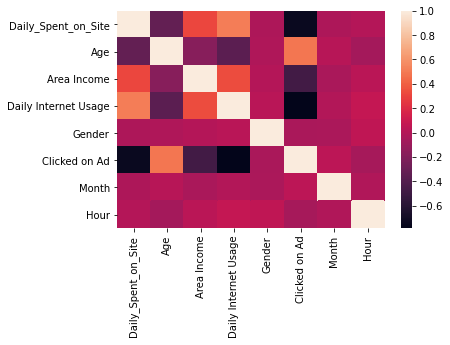

In [46]:
sns.heatmap(data.corr());

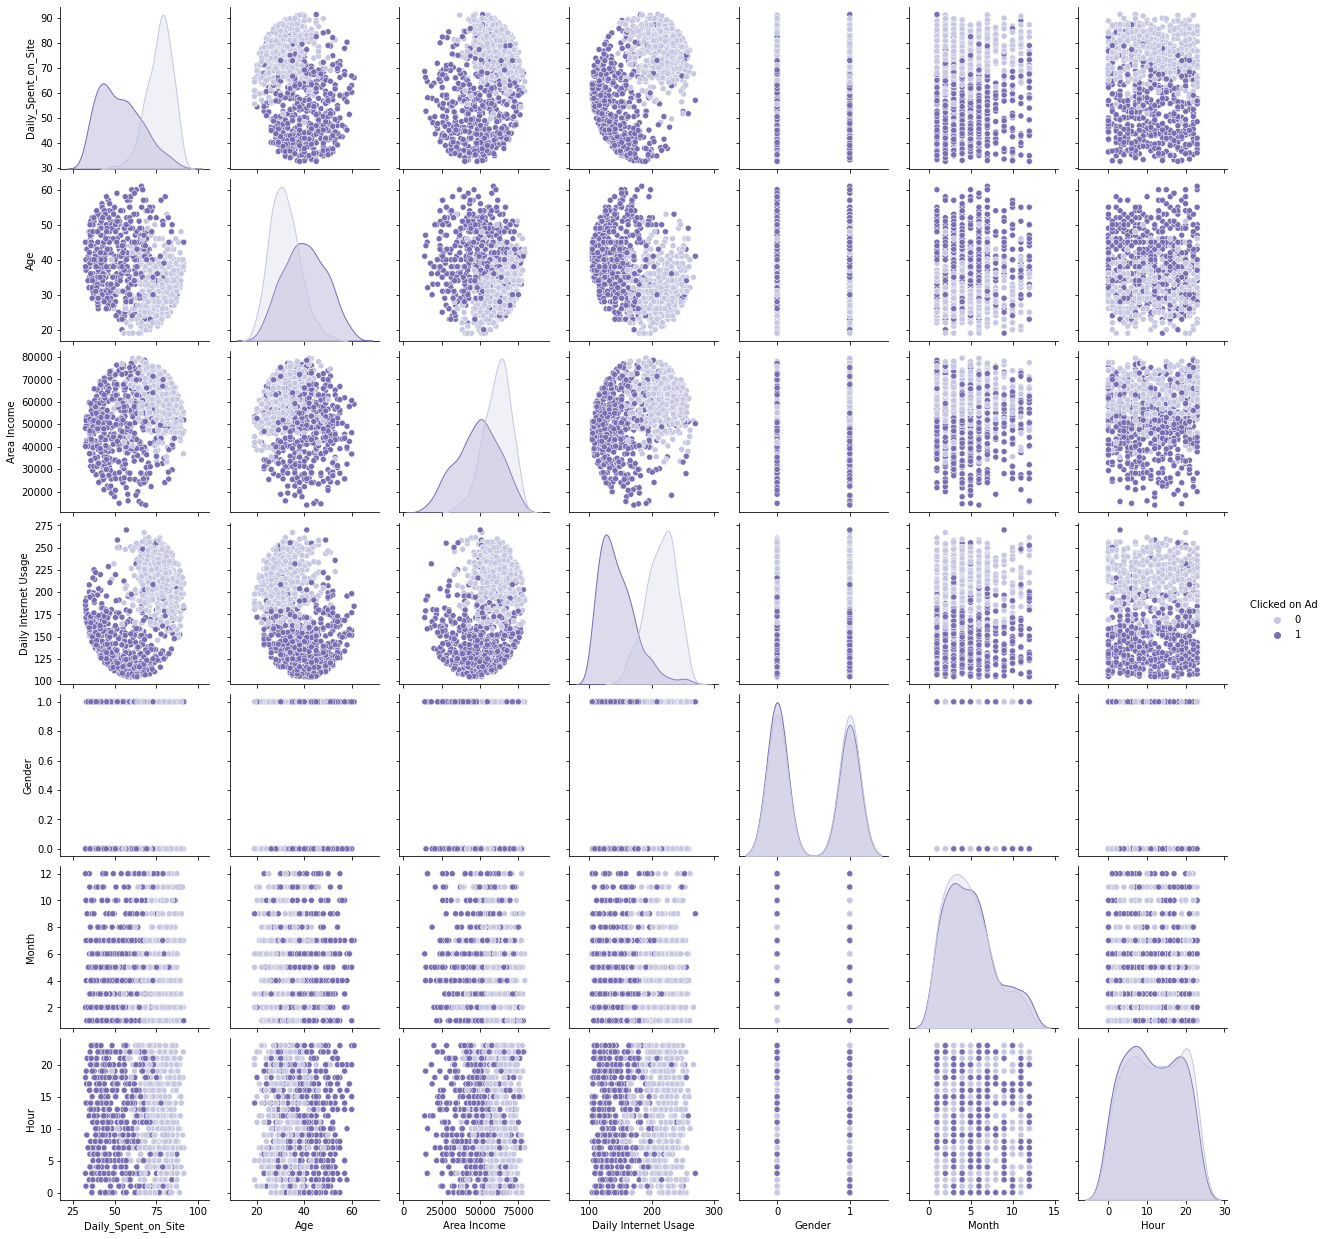

In [48]:
sns.pairplot(data, hue = 'Clicked on Ad',palette = 'Purples');

So the models which could be applied on the Dataset are:

    Logistic Regression
    Simple Vector Method(SVM)
    Decision Tree Classifier

We will go with Decision Tree Classifier and Logistic Regression models.

# Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
from sklearn.model_selection import train_test_split
y  = data['Clicked on Ad']
X = data.iloc[:,[0,1,2,3,6,9,10]]
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [58]:
X

,Daily_Spent_on_Site,Age,Area Income,Daily Internet Usage,Gender,Month,Hour
0,68.95,35.0,61833.90,256.09,0,3,0
1,68.37,31.0,68441.85,193.77,1,4,1
2,69.47,26.0,59785.94,236.50,0,3,20
3,74.15,29.0,54806.18,245.89,1,10,2
4,68.37,35.0,73889.99,225.58,0,3,3
...,...,...,...,...,...,...,...
1004,72.97,30.0,71384.57,208.58,1,11,21
1005,51.30,45.0,67782.17,134.42,1,4,2
1006,51.63,51.0,42415.72,120.37,1,1,17
1007,55.55,19.0,41920.79,187.95,0,3,2
